In [1]:
import pandas as pd 
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("train_wine.csv")
mapping = {'poor': 0,'medium': 1, 'good': 2,  'excellent': 3}
df['class'] = [mapping[item] for item in df['class']] 

dummies = pd.get_dummies(df['color'], drop_first = True)
df = df.drop(['color'], axis=1)
df['isWhite'] = dummies

dummies_vineyard = pd.get_dummies(df['vineyard'], drop_first = True)
df = df.drop(['vineyard'], axis=1)
df = pd.concat([df, dummies_vineyard], axis=1)

dummies_chlor = pd.get_dummies(df['chlor.class'], drop_first = True)
df = df.drop(['chlor.class'], axis=1)
df = pd.concat([df, dummies_chlor], axis=1)

dummies_condition = pd.get_dummies(df['condition'], drop_first = True)
df = df.drop(['condition'], axis=1)
df = pd.concat([df, dummies_condition], axis=1)

df = df.drop(['id'], axis=1)

In [3]:
y = df['class']
x = df.drop(['class'], axis= 1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [4]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        55
           1       0.47      0.36      0.41       449
           2       0.68      0.82      0.74       893
           3       0.00      0.00      0.00        41

    accuracy                           0.63      1438
   macro avg       0.29      0.30      0.29      1438
weighted avg       0.57      0.63      0.59      1438

[[  0  24  31   0]
 [  0 163 286   0]
 [  0 157 736   0]
 [  0   5  36   0]]


C:\Users\macie\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [5]:
svc_model = SVC()
svc_model.fit(X_train,y_train)
predictions = svc_model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

C:\Users\macie\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[  1  21  33   0]
 [  0 171 278   0]
 [  0 109 784   0]
 [  0   1  39   1]]
              precision    recall  f1-score   support

           0       1.00      0.02      0.04        55
           1       0.57      0.38      0.46       449
           2       0.69      0.88      0.77       893
           3       1.00      0.02      0.05        41

    accuracy                           0.67      1438
   macro avg       0.81      0.33      0.33      1438
weighted avg       0.67      0.67      0.63      1438



In [6]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.15      0.15      0.15        55
           1       0.54      0.59      0.56       449
           2       0.75      0.72      0.73       893
           3       0.16      0.15      0.15        41

    accuracy                           0.64      1438
   macro avg       0.40      0.40      0.40      1438
weighted avg       0.64      0.64      0.64      1438

[[  8  25  20   2]
 [ 21 264 161   3]
 [ 26 197 643  27]
 [  0   2  33   6]]


In [7]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)
predictions = rfc.predict(X_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        55
           1       0.66      0.59      0.62       449
           2       0.76      0.88      0.81       893
           3       0.50      0.02      0.05        41

    accuracy                           0.73      1438
   macro avg       0.48      0.37      0.37      1438
weighted avg       0.69      0.73      0.70      1438

[[  0  30  25   0]
 [  0 266 183   0]
 [  0 110 782   1]
 [  0   0  40   1]]


C:\Users\macie\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [8]:
df2 = pd.read_csv("sample_submission.csv")

df3 = pd.read_csv("test_wine.csv")
df3 = df3.drop(['id'], axis=1)
df2 = pd.concat([df2, df3], axis=1)
df2 = df2.drop(['id'], axis=1)
mapping = {'poor': 0,'medium': 1, 'good': 2,  'excellent': 3}
df2['class'] = [mapping[item] for item in df2['class']] 

dummies = pd.get_dummies(df2['color'], drop_first = True)
df2 = df2.drop(['color'], axis=1)
df2['isWhite'] = dummies

dummies_vineyard = pd.get_dummies(df2['vineyard'], drop_first = True)
df2 = df2.drop(['vineyard'], axis=1)
df2 = pd.concat([df2, dummies_vineyard], axis=1)

dummies_chlor = pd.get_dummies(df2['chlor.class'], drop_first = True)
df2 = df2.drop(['chlor.class'], axis=1)
df2 = pd.concat([df2, dummies_chlor], axis=1)

dummies_condition = pd.get_dummies(df2['condition'], drop_first = True)
df2 = df2.drop(['condition'], axis=1)
df2 = pd.concat([df2, dummies_condition], axis=1)

In [9]:
df3 = pd.concat([df, df2], axis=0)

In [10]:
y = df3['class']
x = df3.drop(['class'], axis= 1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [11]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

C:\Users\macie\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        55
           1       0.46      0.30      0.36       680
           2       0.68      0.84      0.75      1371
           3       0.00      0.00      0.00        39

    accuracy                           0.63      2145
   macro avg       0.28      0.29      0.28      2145
weighted avg       0.58      0.63      0.60      2145

[[   0   19   36    0]
 [   0  205  475    0]
 [   0  219 1152    0]
 [   0    1   38    0]]


In [12]:
svc_model = SVC()
svc_model.fit(X_train,y_train)
predictions = svc_model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

C:\Users\macie\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[   0   20   35    0]
 [   0  243  437    0]
 [   0  180 1191    0]
 [   0    2   37    0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        55
           1       0.55      0.36      0.43       680
           2       0.70      0.87      0.78      1371
           3       0.00      0.00      0.00        39

    accuracy                           0.67      2145
   macro avg       0.31      0.31      0.30      2145
weighted avg       0.62      0.67      0.63      2145



C:\Users\macie\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [13]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.09      0.07      0.08        55
           1       0.61      0.63      0.62       680
           2       0.79      0.78      0.78      1371
           3       0.09      0.10      0.10        39

    accuracy                           0.70      2145
   macro avg       0.39      0.40      0.39      2145
weighted avg       0.70      0.70      0.70      2145

[[   4   24   27    0]
 [  19  429  228    4]
 [  21  249 1066   35]
 [   2    1   32    4]]


In [14]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)
predictions = rfc.predict(X_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        55
           1       0.75      0.65      0.69       680
           2       0.80      0.91      0.85      1371
           3       0.00      0.00      0.00        39

    accuracy                           0.79      2145
   macro avg       0.39      0.39      0.39      2145
weighted avg       0.75      0.79      0.77      2145

[[   0   27   28    0]
 [   0  442  238    0]
 [   0  123 1247    1]
 [   0    1   38    0]]


C:\Users\macie\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [35]:
model = Sequential()

model.add(Dense(200, activation='relu', input_dim = 50))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
y_train = tf.keras.utils.to_categorical(y_train,num_classes=4)
y_test = tf.keras.utils.to_categorical(y_test,num_classes=4)

In [36]:
model.fit(x=X_train.values, y=y_train, epochs=200, batch_size=128, validation_data=(X_test.values, y_test))

Train on 4352 samples, validate on 2145 samples
Epoch 1/200
4352/4352 [==============================] - 0s 98us/sample - loss: 8.7407 - accuracy: 0.4095 - val_loss: 0.8620 - val_accuracy: 0.6392
Epoch 2/200
4352/4352 [==============================] - 0s 20us/sample - loss: 2.4761 - accuracy: 0.4582 - val_loss: 0.8902 - val_accuracy: 0.6392
Epoch 3/200
4352/4352 [==============================] - 0s 20us/sample - loss: 1.7445 - accuracy: 0.4736 - val_loss: 0.9012 - val_accuracy: 0.6392
Epoch 4/200
4352/4352 [==============================] - 0s 20us/sample - loss: 1.3927 - accuracy: 0.5223 - val_loss: 0.8994 - val_accuracy: 0.6392
Epoch 5/200
4352/4352 [==============================] - 0s 20us/sample - loss: 1.2404 - accuracy: 0.5250 - val_loss: 0.8804 - val_accuracy: 0.6392
Epoch 6/200
4352/4352 [==============================] - 0s 20us/sample - loss: 1.1306 - accuracy: 0.5480 - val_loss: 0.8878 - val_accuracy: 0.6392
Epoch 7/200
4352/4352 [==============================] - 0s 19us

Epoch 56/200
4352/4352 [==============================] - 0s 23us/sample - loss: 0.8353 - accuracy: 0.6381 - val_loss: 0.8226 - val_accuracy: 0.6392
Epoch 57/200
4352/4352 [==============================] - 0s 20us/sample - loss: 0.8363 - accuracy: 0.6383 - val_loss: 0.8252 - val_accuracy: 0.6392
Epoch 58/200
4352/4352 [==============================] - 0s 22us/sample - loss: 0.8370 - accuracy: 0.6379 - val_loss: 0.8204 - val_accuracy: 0.6392
Epoch 59/200
4352/4352 [==============================] - 0s 20us/sample - loss: 0.8357 - accuracy: 0.6381 - val_loss: 0.8243 - val_accuracy: 0.6392
Epoch 60/200
4352/4352 [==============================] - 0s 22us/sample - loss: 0.8369 - accuracy: 0.6376 - val_loss: 0.8224 - val_accuracy: 0.6392
Epoch 61/200
4352/4352 [==============================] - 0s 23us/sample - loss: 0.8377 - accuracy: 0.6383 - val_loss: 0.8258 - val_accuracy: 0.6392
Epoch 62/200
4352/4352 [==============================] - 0s 24us/sample - loss: 0.8311 - accuracy: 0.6381

Epoch 111/200
4352/4352 [==============================] - 0s 21us/sample - loss: 0.7252 - accuracy: 0.6829 - val_loss: 0.6883 - val_accuracy: 0.7049
Epoch 112/200
4352/4352 [==============================] - 0s 20us/sample - loss: 0.7224 - accuracy: 0.6861 - val_loss: 0.6940 - val_accuracy: 0.6970
Epoch 113/200
4352/4352 [==============================] - 0s 20us/sample - loss: 0.7149 - accuracy: 0.6958 - val_loss: 0.6798 - val_accuracy: 0.7152
Epoch 114/200
4352/4352 [==============================] - 0s 19us/sample - loss: 0.7253 - accuracy: 0.6880 - val_loss: 0.7056 - val_accuracy: 0.6984
Epoch 115/200
4352/4352 [==============================] - 0s 19us/sample - loss: 0.7166 - accuracy: 0.6907 - val_loss: 0.6911 - val_accuracy: 0.7007
Epoch 116/200
4352/4352 [==============================] - 0s 20us/sample - loss: 0.7256 - accuracy: 0.6875 - val_loss: 0.6888 - val_accuracy: 0.7016
Epoch 117/200
4352/4352 [==============================] - 0s 19us/sample - loss: 0.7052 - accuracy:

4352/4352 [==============================] - 0s 20us/sample - loss: 0.6789 - accuracy: 0.7089 - val_loss: 0.6595 - val_accuracy: 0.7207
Epoch 166/200
4352/4352 [==============================] - 0s 20us/sample - loss: 0.6753 - accuracy: 0.7128 - val_loss: 0.6694 - val_accuracy: 0.7058
Epoch 167/200
4352/4352 [==============================] - 0s 20us/sample - loss: 0.6737 - accuracy: 0.7165 - val_loss: 0.6609 - val_accuracy: 0.7133
Epoch 168/200
4352/4352 [==============================] - 0s 21us/sample - loss: 0.6801 - accuracy: 0.7151 - val_loss: 0.6723 - val_accuracy: 0.7058
Epoch 169/200
4352/4352 [==============================] - 0s 20us/sample - loss: 0.6679 - accuracy: 0.7208 - val_loss: 0.6604 - val_accuracy: 0.7189
Epoch 170/200
4352/4352 [==============================] - 0s 21us/sample - loss: 0.6679 - accuracy: 0.7125 - val_loss: 0.6654 - val_accuracy: 0.7198
Epoch 171/200
4352/4352 [==============================] - 0s 20us/sample - loss: 0.6714 - accuracy: 0.7109 - val_

In [37]:
losses = pd.DataFrame(model.history.history)

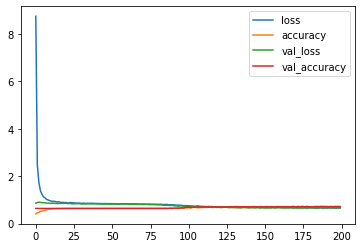

In [38]:
losses.plot()

In [39]:
score = model.evaluate(X_test, y_test)

2145/2145 [==============================] - 0s 22us/sample - loss: 0.6655 - accuracy: 0.7142


In [40]:
score

[0.6655338591906852, 0.7142191]

In [22]:
df3.columns

Index(['class', 'fixed.acidity', 'acid.sulfur', 'volatile.acidity',
       'sulfur.taste', 'citric.acid', 'residual.sugar', 'chlorides',
       'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density', 'pH',
       'acid.taste', 'sulphates', 'acidity.variance', 'alcohol', 'isWhite',
       'B', 'C', 'D', 'E', 'b2', 'b3', 'c1', 'c2', 'c3', 'd1', 'd2', 'd3',
       'e1', 'e2', 'e3', 'f1', 'f2', 'f3', 'g1', 'g2', 'g3', 'h1', 'h2', 'h3',
       'i1', 'i2', 'i3', 'I1', 'I2', 'P1', 'P2', 'S1', 'S2', 'S3'],
      dtype='object')

In [23]:
df3 = df3.drop(['B', 'C', 'D', 'E', 'b2', 'b3', 'c1', 'c2', 'c3', 'd1', 'd2', 'd3',
       'e1', 'e2', 'e3', 'f1', 'f2', 'f3', 'g1', 'g2', 'g3', 'h1', 'h2', 'h3',
       'i1', 'i2', 'i3', 'I1', 'I2', 'P1', 'P2', 'S1', 'S2', 'S3'], axis = 1)